# 🌐 t-SNE (t-Distributed Stochastic Neighbor Embedding)

t-SNE is a **non-linear dimensionality reduction** technique mainly used for **visualizing high-dimensional data** in **2D or 3D space**.

---

## 📌 Intuition
- High-dimensional data is hard to interpret directly.
- t-SNE converts similarities between points into **probabilities**:
  - Nearby points → high probability of being neighbors.
  - Distant points → low probability.
- It tries to maintain **local structure** (clusters) when projecting to lower dimensions.

---

## 🧮 How it Works (Simplified Steps)

1. **Compute Pairwise Similarities in High-Dimension**
   - Probability that point *j* is a neighbor of *i*:  
     \[
     p_{j|i} = \frac{\exp(-\|x_i - x_j\|^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-\|x_i - x_k\|^2 / 2\sigma_i^2)}
     \]

2. **Compute Joint Probabilities**
   - Symmetrize:
     \[
     p_{ij} = \frac{p_{j|i} + p_{i|j}}{2N}
     \]

3. **Map to Low-Dimensional Space**
   - Represent each point in 2D/3D: \( y_i \).
   - Similarity in low-dimension (using Student t-distribution with 1 degree of freedom):
     \[
     q_{ij} = \frac{(1 + \|y_i - y_j\|^2)^{-1}}{\sum_{k \neq l}(1 + \|y_k - y_l\|^2)^{-1}}
     \]

4. **Optimize (Minimize KL Divergence)**
   - Minimize difference between \(p_{ij}\) and \(q_{ij}\):
     \[
     C = KL(P \| Q) = \sum_{i \neq j} p_{ij} \log \frac{p_{ij}}{q_{ij}}
     \]

---

## ⚡ Key Features
- Preserves **local structure** (clusters).
- Good for **visualization** (2D/3D).
- Captures **non-linear relationships**.

---

## ✅ Advantages
- Excellent for visualization of high-dimensional data.
- Handles non-linear structures.
- Clusters often appear naturally.

## ❌ Disadvantages
- **Computationally expensive** (slow on large datasets).
- **Non-deterministic** (results may vary run-to-run).
- **Not for feature reduction** in ML pipelines (better for visualization only).
- Choice of hyperparameters (e.g., perplexity, learning rate) matters a lot.

---

## ⚙️ Hyperparameters
- **Perplexity**: Related to the number of nearest neighbors (common range: 5–50).
- **Learning Rate**: Impacts convergence (too high → scattered, too low → stuck).
- **n_iter**: Number of iterations (default ~1000+).
- **n_components**: Target dimensions (2 or 3 for visualization).

---

## 📊 Applications
- Visualizing **word embeddings** (e.g., Word2Vec, GloVe).
- Visualizing **images** in reduced space (e.g., MNIST digits).
- Exploring **gene expression** data.
- Understanding **clusters in customer segmentation**.

---




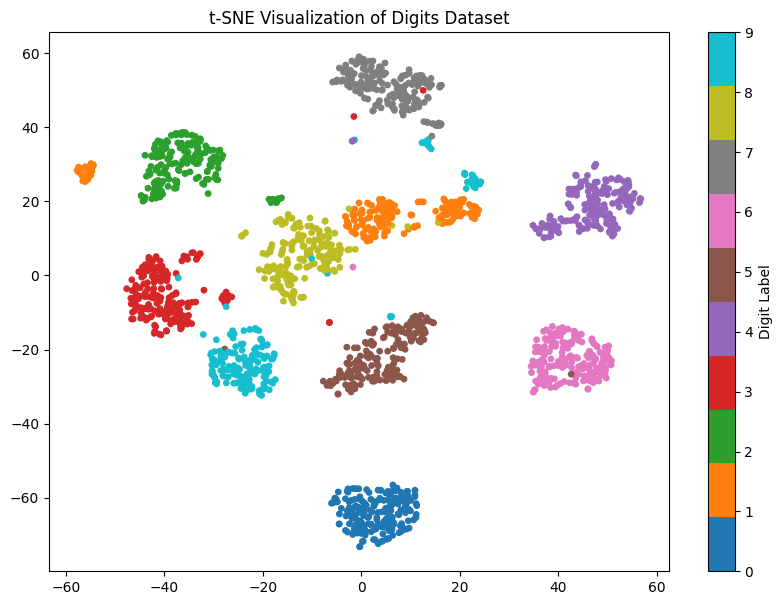

In [2]:
## 🐍 Example in Python (scikit-learn)

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load sample dataset (handwritten digits)
digits = load_digits()
X, y = digits.data, digits.target

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plot
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, cmap="tab10", s=15)
plt.colorbar(scatter, ticks=range(10), label="Digit Label")
plt.title("t-SNE Visualization of Digits Dataset")
plt.show()